Na aula anterior nós utilizamos somente 4 atributos para aplicar a regressão múltipla. O objetivo deste exercício é criar um modelo de regressão linear múltipla utilizando todos os atributos da base de dados. Compare os resultados entre os algoritmos

In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
dataset = pd.read_csv('house_prices.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [50]:
dataset.drop(labels = ['id', 'date', 'sqft_living', 'sqft_lot'], axis = 1, inplace=True)
dataset.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: >

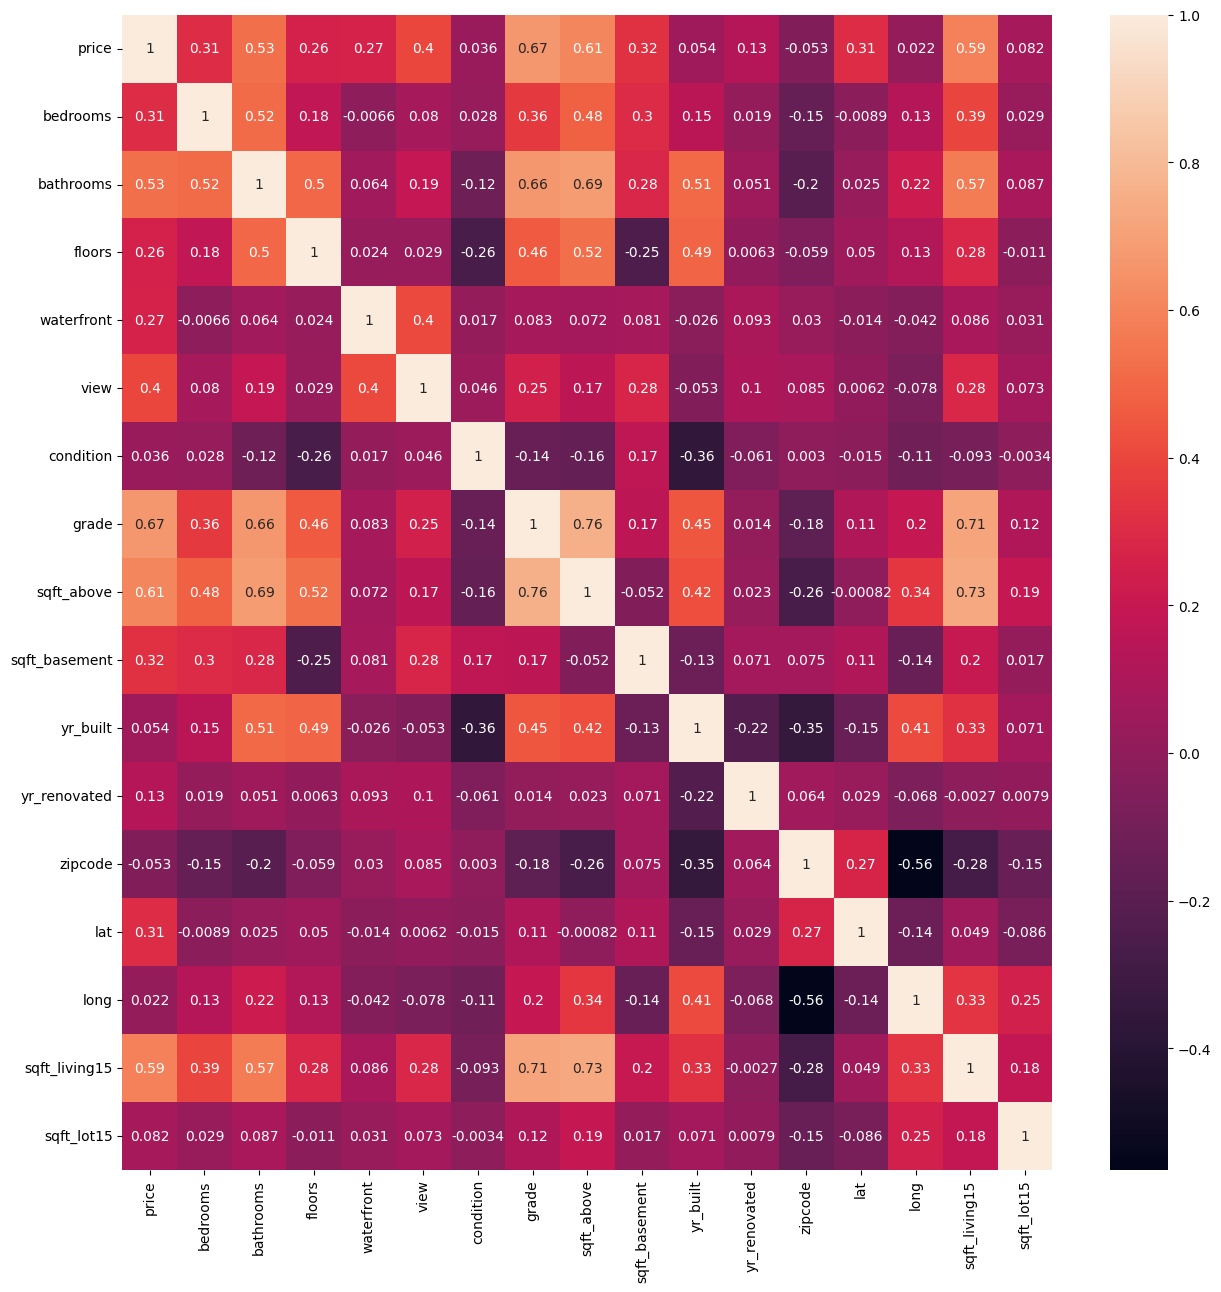

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), annot=True)

In [52]:
X = dataset.iloc[:, [2, 3, 9, 10]].values
y = dataset.iloc[:, 0].values

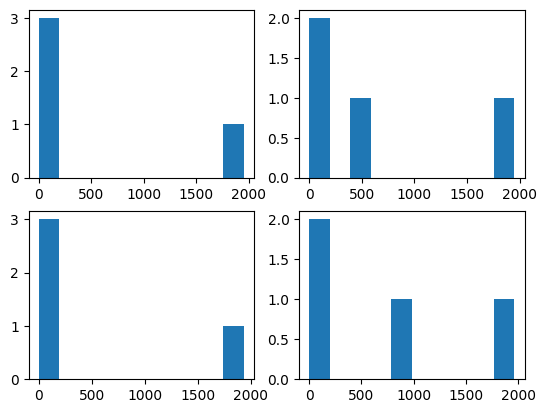

In [53]:
f, ax = plt.subplots(2, 2)
ax[0, 0].hist(X[0])
ax[0, 1].hist(X[1])
ax[1, 0].hist(X[2])
ax[1, 1].hist(X[3]);

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

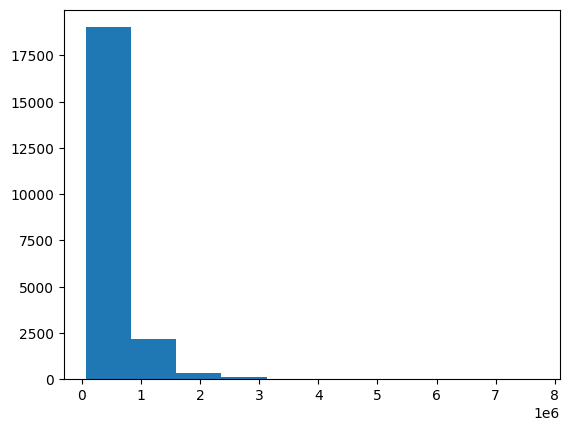

In [54]:
plt.hist(y)

In [55]:
y = np.log(y)


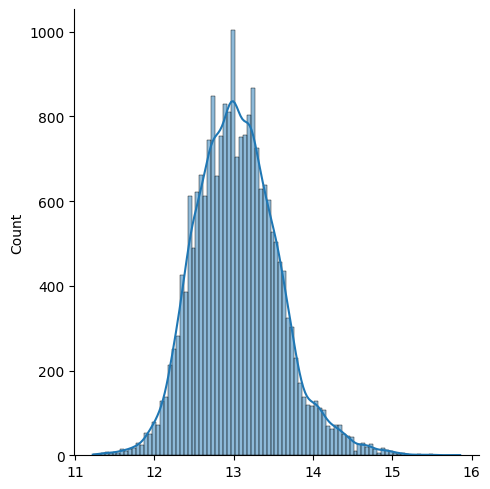

In [56]:
sns.displot(y, kde = True)

In [57]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_treinamento.shape, X_teste.shape

((17290, 4), (4323, 4))

In [58]:
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [59]:
regressor.score(X_treinamento, y_treinamento)

0.39251171573180055

In [60]:
regressor.score(X_teste, y_teste)

0.4049979311207925

In [61]:
previsoes = regressor.predict(X_teste)
mean_absolute_error(y_teste, previsoes)

np.float64(0.33079826724270256)

In [62]:
dataset.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
X2 = dataset.iloc[:,1:15].values
y2 = dataset.iloc[:,0].values

In [81]:
x2_treino,x2_teste,y2_treino,y2_teste = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

In [82]:
regressor2 = LinearRegression()
regressor2.fit(x2_treino, y2_treino)

LinearRegression()

In [85]:
regressor2.score(x2_treino,y2_treino)

0.7028343820225652

In [87]:
regressor2.score(x2_teste, y2_teste)

0.6849149549924585